In [1]:
import os
import wave
import struct
import pandas as pd
import scipy
from scipy import signal
from scipy.fft import fftshift

import numpy as np
np.random.seed(seed=42)
import seaborn as sns

import matplotlib.pyplot as plt 
import matplotlib.pylab as plab

import IPython.display as ipd
import librosa
import librosa.display

# Funções auxiliares

In [2]:
def plot_wave(caminho, titulo):    
    data, sample_rate = librosa.load(caminho)
    print("Frequência do áudio: ", sample_rate)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.title(titulo)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")   
    
def plot_fft_wave(caminho, titulo, x_limits):
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    fig, ax = plt.subplots()
    
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    ax.set_xlim(x_limits)
    plt.grid()
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title(titulo)
    
def plot_wave_with_fft(caminho):
    data, sample_rate = librosa.load(caminho)
    n = len(data)
    T = 1/sample_rate
    yf = scipy.fft.fft(data) #Aplica a FFT no audio
    xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 2, 1)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.xlabel("Tempo")
    plt.ylabel("Amplitude")
    plt.title("Onda")
    
    plt.subplot(1, 2, 2)
    plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequência")
    plt.ylabel("Magnitude")
    plt.title("FFT")
    
def plot_multiple_FFT(lista_caminhos, xlim=[0,2000]):
    plt.figure(figsize=(15, 10))
    plt.grid()
    plt.xlabel("Frequência")
    plt.xlim(xlim)
    plt.ylabel("Magnitude")    
    
    for caminho in lista_caminhos:
        data, sample_rate = librosa.load(caminho)
        n = len(data)
        T = 1/sample_rate
        yf = scipy.fft.fft(data) #Aplica a FFT no audio
        xf = np.linspace(0.0, 1.0/(2.0*T), n//2) #Cria um array contendo os pontos de x correspondentes ao yf

        plt.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    
    plt.legend(lista_caminhos)
        
def spectrograma(caminho):
    x, fs = librosa.load(caminho)
    f, t, Sxx = signal.spectrogram(x, fs)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.ylabel('Frequência [Hz]')
    plt.xlabel('Tempo [sec]')

# Analise do cenário com som indústrial inserido

In [3]:
base_path = '../Obtenção de dados/Saídas/2 - Som indústrial inserido/'
base_path

'../Obtenção de dados/Saídas/2 - Som indústrial inserido/'

# Carregar os dados

In [4]:
tests_path = ['0 - Regime Normal/', 
              '1 - Falta de tensão/', 
              '2 - Sobrecarga/', 
              '3 - Desbalanceamento do eixo/']

tests_path

['0 - Regime Normal/',
 '1 - Falta de tensão/',
 '2 - Sobrecarga/',
 '3 - Desbalanceamento do eixo/']

In [5]:
os.listdir(base_path)

['2 - Sobrecarga',
 '1 - Falta de tensão',
 '3 - Desbalanceamento do eixo',
 '0 - Regime Normal']

### Encontrar o caminho completo de todos os arquivos

In [6]:
all_files = []

for f in tests_path:    
    all_files = all_files + [(base_path + f + i, f) for i in os.listdir(base_path + f)]

all_files

[('../Obtenção de dados/Saídas/2 - Som indústrial inserido/0 - Regime Normal/2021-05-26 22:01:47.511928.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/2 - Som indústrial inserido/0 - Regime Normal/2021-05-26 22:03:29.958938.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/2 - Som indústrial inserido/0 - Regime Normal/2021-05-26 22:01:35.359185.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/2 - Som indústrial inserido/0 - Regime Normal/2021-05-26 22:02:35.518746.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/2 - Som indústrial inserido/0 - Regime Normal/2021-05-26 22:03:08.334314.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/2 - Som indústrial inserido/0 - Regime Normal/2021-05-26 22:03:54.049081.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/2 - Som indústrial inserido/0 - Regime Normal/2021-05-26 22:02:24.220128.wav',
  '0 - Regime Normal/'),
 ('../Obtenção de dados/Saídas/2 - Som indústrial inser

## Carregar os arquivos e adiciona-los em um conjunto manipulável

#### Exemplo para um arquivo

In [7]:
import wave
import struct

CHUNK = 1024 * 2

some_file = '../Obtenção de dados/Saídas/1 - Som ambiente/0 - Regime Normal/2021-05-26 20:53:43.925687.wav'
wave_file = wave.open(some_file, 'rb')
data = wave_file.readframes(CHUNK)
dataInt = struct.unpack(str(CHUNK) + 'h', data)

#### Carregar todos

In [8]:
df_audio = pd.DataFrame()

for f, c in all_files:
    df_aux = pd.DataFrame()
    
    wave_file = wave.open(f, 'rb')
    data = wave_file.readframes(CHUNK)
    dataInt = struct.unpack(str(CHUNK) + 'h', data)
    
    df_aux = df_aux.append(pd.Series(dataInt), ignore_index=True)
    df_aux['class'] = c
    df_audio = pd.concat([df_audio, df_aux])
    
    
    
df_audio = df_audio.reset_index(drop=True)
df_audio

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,-31.0,284.0,611.0,1078.0,1529.0,1322.0,225.0,-1049.0,-1565.0,-1078.0,...,-863.0,-1134.0,-544.0,515.0,1160.0,900.0,40.0,-810.0,-1025.0,0 - Regime Normal/
1,-694.0,32.0,946.0,1324.0,1039.0,311.0,-556.0,-1187.0,-1351.0,-1060.0,...,-1017.0,-686.0,-85.0,406.0,630.0,444.0,10.0,-405.0,-507.0,0 - Regime Normal/
2,419.0,401.0,415.0,407.0,388.0,389.0,400.0,346.0,279.0,218.0,...,-664.0,-614.0,-475.0,-314.0,-190.0,-56.0,48.0,78.0,-10.0,0 - Regime Normal/
3,472.0,576.0,531.0,458.0,399.0,298.0,307.0,487.0,839.0,1132.0,...,1252.0,1487.0,1317.0,892.0,537.0,443.0,375.0,193.0,-83.0,0 - Regime Normal/
4,685.0,777.0,781.0,673.0,453.0,255.0,114.0,71.0,23.0,-60.0,...,395.0,423.0,526.0,629.0,653.0,641.0,586.0,606.0,604.0,0 - Regime Normal/
5,1148.0,873.0,844.0,1200.0,1438.0,1184.0,628.0,140.0,56.0,166.0,...,135.0,83.0,341.0,1051.0,1909.0,2255.0,1726.0,504.0,-472.0,0 - Regime Normal/
6,167.0,-451.0,-404.0,-90.0,301.0,744.0,1346.0,2196.0,3001.0,3245.0,...,947.0,445.0,-326.0,-966.0,-1300.0,-1440.0,-1522.0,-1284.0,-429.0,0 - Regime Normal/
7,442.0,415.0,407.0,492.0,536.0,574.0,599.0,665.0,714.0,750.0,...,370.0,415.0,508.0,650.0,798.0,816.0,751.0,632.0,452.0,0 - Regime Normal/
8,852.0,947.0,881.0,714.0,535.0,378.0,348.0,409.0,482.0,609.0,...,28.0,44.0,-38.0,-176.0,-233.0,-193.0,-57.0,100.0,208.0,0 - Regime Normal/
9,3.0,216.0,232.0,98.0,-180.0,-336.0,-448.0,-569.0,-732.0,-777.0,...,-635.0,-551.0,-255.0,5.0,152.0,199.0,104.0,-104.0,-286.0,0 - Regime Normal/


## Salvar os dados em um conjunto intermediário

In [9]:
df_audio.to_csv('Saídas/dados_carregados.csv')

### Verificar a quantidade de amostras por classe

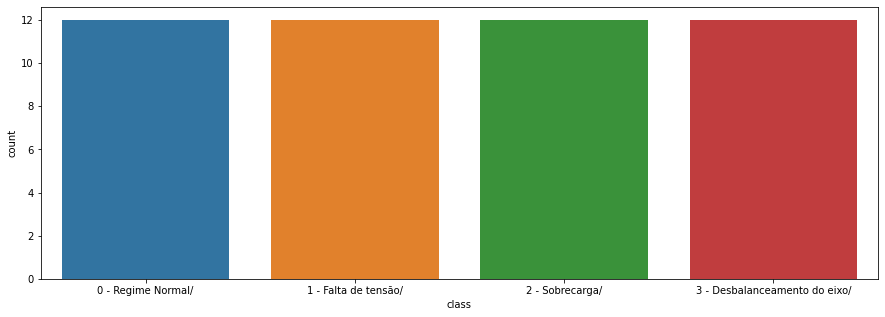

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_audio, x = 'class');

# Análise das formas de onda no dominio da transformada

In [11]:
regime_normal = all_files[0][0]
falta_tensao = all_files[14][0]
sobrecarga = all_files[24][0]
desbalanceado = all_files[36][0]

### Regime normal

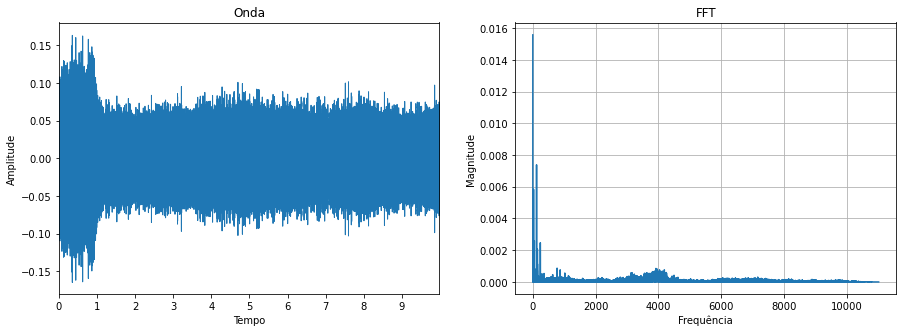

In [12]:
plot_wave_with_fft(regime_normal)

### Falta de tensão

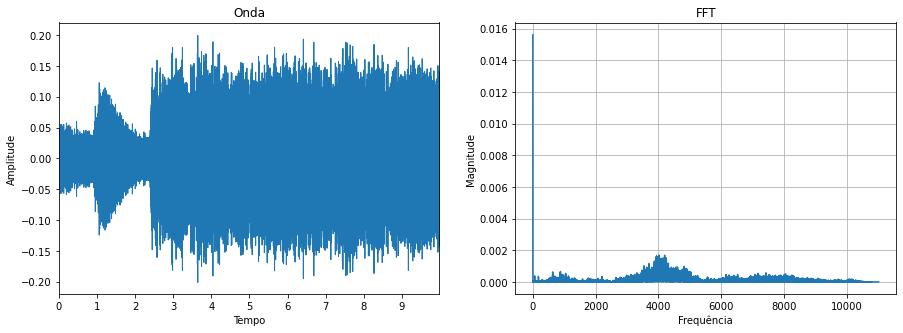

In [13]:
plot_wave_with_fft(falta_tensao)

### Sobrecarga

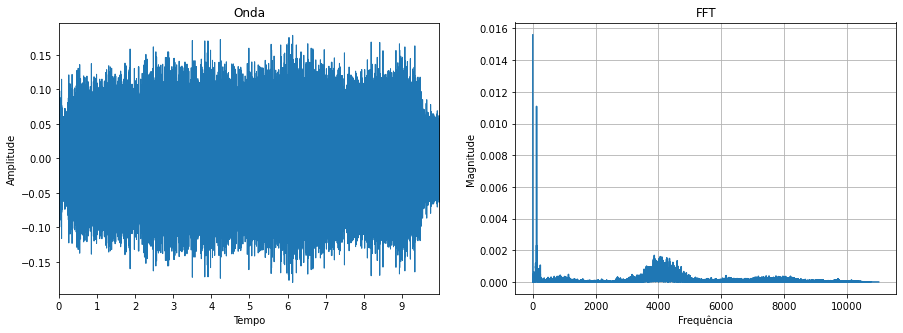

In [14]:
plot_wave_with_fft(sobrecarga)

### Desbalanceamento

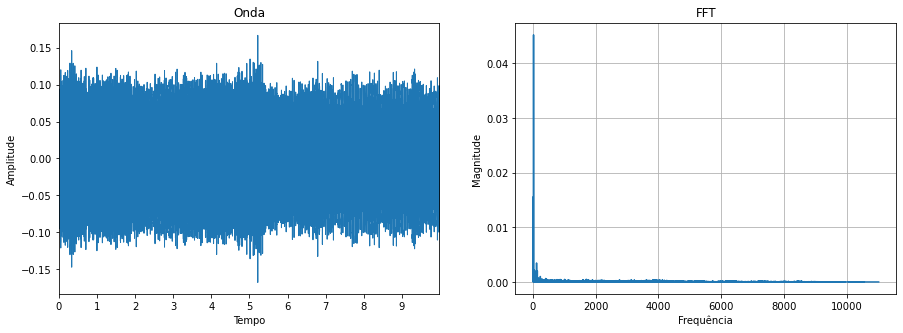

In [15]:
plot_wave_with_fft(desbalanceado)

### Notas observadas

* Pouca variação no espectro
* Muita variação na amplitude

### Considerações no processamento
* Experimentar um modo hibrido de treinamento caso não se tenha um bom desempenho apenas com a FFT\

# Resumo das faixas de frequência

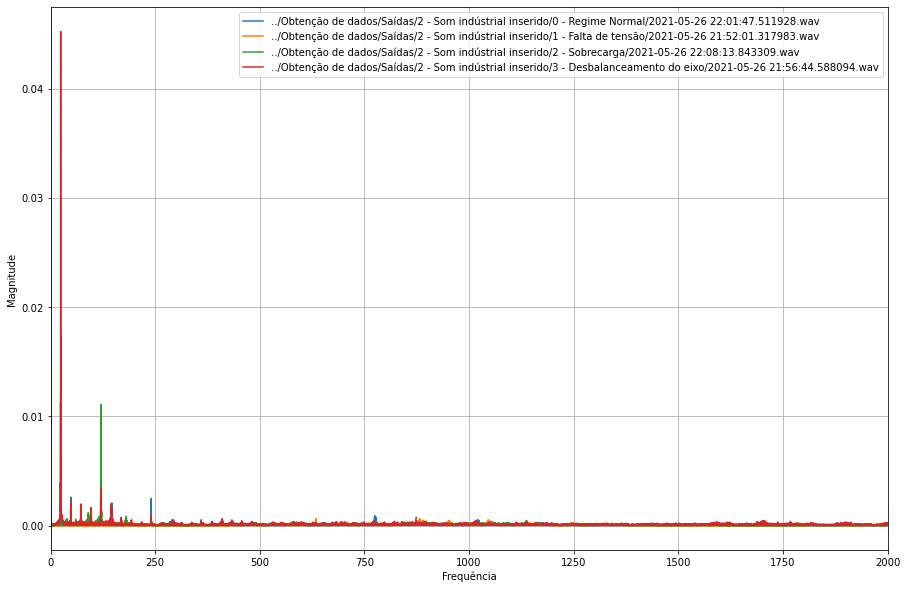

In [16]:
lista_fft = [
    regime_normal,
    falta_tensao,
    sobrecarga,
    desbalanceado
]

plot_multiple_FFT(lista_fft)

### Notas:
* Amplo espectro com uma variação maior que com som ambiente

# Análise com Espectograma 

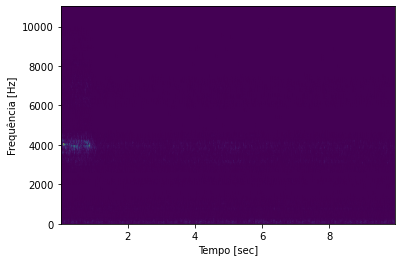

In [17]:
spectrograma(regime_normal)

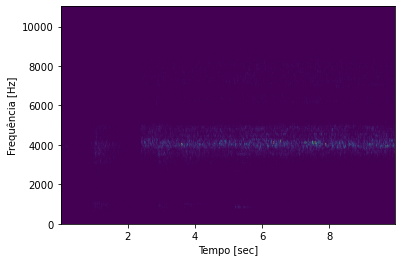

In [18]:
spectrograma(falta_tensao)

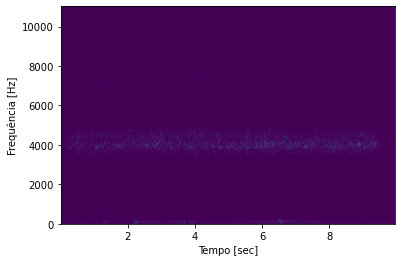

In [19]:
spectrograma(sobrecarga)

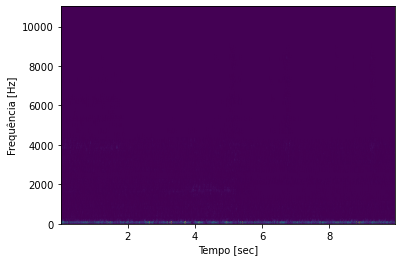

In [20]:
spectrograma(desbalanceado)

### Notas
* A variação da frequência no tempo fica um pouco mais evidente com o uso do espectrograma

# 1º Teste: Conjunto de dados cru sem aplicação da FFT

In [21]:
import pandas as pd

df_audio = pd.read_csv('Saídas/dados_carregados.csv', index_col=0)
df_audio.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,class
0,-31.0,284.0,611.0,1078.0,1529.0,1322.0,225.0,-1049.0,-1565.0,-1078.0,...,-863.0,-1134.0,-544.0,515.0,1160.0,900.0,40.0,-810.0,-1025.0,0 - Regime Normal/
1,-694.0,32.0,946.0,1324.0,1039.0,311.0,-556.0,-1187.0,-1351.0,-1060.0,...,-1017.0,-686.0,-85.0,406.0,630.0,444.0,10.0,-405.0,-507.0,0 - Regime Normal/
2,419.0,401.0,415.0,407.0,388.0,389.0,400.0,346.0,279.0,218.0,...,-664.0,-614.0,-475.0,-314.0,-190.0,-56.0,48.0,78.0,-10.0,0 - Regime Normal/
3,472.0,576.0,531.0,458.0,399.0,298.0,307.0,487.0,839.0,1132.0,...,1252.0,1487.0,1317.0,892.0,537.0,443.0,375.0,193.0,-83.0,0 - Regime Normal/
4,685.0,777.0,781.0,673.0,453.0,255.0,114.0,71.0,23.0,-60.0,...,395.0,423.0,526.0,629.0,653.0,641.0,586.0,606.0,604.0,0 - Regime Normal/


### Separação de entradas e saídas

In [22]:
X = df_audio.drop(['class'], axis=1)
y = df_audio['class']

### Encode das saidas

In [23]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

y = lbl_enc.fit_transform(y)

## Separação treino e teste 

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experimentação com algoritmos tradicionais 

In [25]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
        
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.200


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.100


DecisionTreeClassifier()
model score: 0.200


RandomForestClassifier()
model score: 0.300


AdaBoostClassifier()
model score: 0.300


GradientBoostingClassifier()
model score: 0.500




## Experimentação com Algoritimo de aprendizagem profunda

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(12, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [30]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 36.4590 - accuracy: 0.2895
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: -232.2571 - accuracy: 0.2632
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: -554.3774 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: -1051.2856 - accuracy: 0.2632
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: -1727.8226 - accuracy: 0.2632
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: -2603.4019 - accuracy: 0.2632
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: -3691.5942 - accuracy: 0.2632
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: -5010.5874 - accuracy: 0.2632
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: -6577.3159 - accuracy: 0.2632
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: -8423.8926 - a

1/1 [==============================] - 0s 7ms/step - loss: -4311871.5000 - accuracy: 0.2632
Epoch 80/1000
1/1 [==============================] - 0s 5ms/step - loss: -4524072.0000 - accuracy: 0.2632
Epoch 81/1000
1/1 [==============================] - 0s 2ms/step - loss: -4743987.5000 - accuracy: 0.2632
Epoch 82/1000
1/1 [==============================] - 0s 2ms/step - loss: -4971720.0000 - accuracy: 0.2632
Epoch 83/1000
1/1 [==============================] - 0s 2ms/step - loss: -5207524.5000 - accuracy: 0.2632
Epoch 84/1000
1/1 [==============================] - 0s 2ms/step - loss: -5451530.5000 - accuracy: 0.2632
Epoch 85/1000
1/1 [==============================] - 0s 2ms/step - loss: -5703926.0000 - accuracy: 0.2632
Epoch 86/1000
1/1 [==============================] - 0s 2ms/step - loss: -5964870.5000 - accuracy: 0.2632
Epoch 87/1000
1/1 [==============================] - 0s 2ms/step - loss: -6234510.5000 - accuracy: 0.2632
Epoch 88/1000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 3ms/step - loss: -54591688.0000 - accuracy: 0.2632
Epoch 156/1000
1/1 [==============================] - 0s 3ms/step - loss: -55888524.0000 - accuracy: 0.2632
Epoch 157/1000
1/1 [==============================] - 0s 3ms/step - loss: -57206540.0000 - accuracy: 0.2632
Epoch 158/1000
1/1 [==============================] - 0s 5ms/step - loss: -58545872.0000 - accuracy: 0.2632
Epoch 159/1000
1/1 [==============================] - 0s 3ms/step - loss: -59906804.0000 - accuracy: 0.2632
Epoch 160/1000
1/1 [==============================] - 0s 4ms/step - loss: -61289424.0000 - accuracy: 0.2632
Epoch 161/1000
1/1 [==============================] - 0s 2ms/step - loss: -62693956.0000 - accuracy: 0.2632
Epoch 162/1000
1/1 [==============================] - 0s 3ms/step - loss: -64120428.0000 - accuracy: 0.2632
Epoch 163/1000
1/1 [==============================] - 0s 2ms/step - loss: -65569100.0000 - accuracy: 0.2632
Epoch 164/1000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: -222358224.0000 - accuracy: 0.2632
Epoch 231/1000
1/1 [==============================] - 0s 2ms/step - loss: -225723280.0000 - accuracy: 0.2632
Epoch 232/1000
1/1 [==============================] - 0s 2ms/step - loss: -229122368.0000 - accuracy: 0.2632
Epoch 233/1000
1/1 [==============================] - 0s 2ms/step - loss: -232555568.0000 - accuracy: 0.2632
Epoch 234/1000
1/1 [==============================] - 0s 2ms/step - loss: -236023056.0000 - accuracy: 0.2632
Epoch 235/1000
1/1 [==============================] - 0s 2ms/step - loss: -239525184.0000 - accuracy: 0.2632
Epoch 236/1000
1/1 [==============================] - 0s 2ms/step - loss: -243061728.0000 - accuracy: 0.2632
Epoch 237/1000
1/1 [==============================] - 0s 10ms/step - loss: -246633168.0000 - accuracy: 0.2632
Epoch 238/1000
1/1 [==============================] - 0s 1ms/step - loss: -250239728.0000 - accuracy: 0.2632
Epoch 239/1000
1/1 [=============

1/1 [==============================] - 0s 1ms/step - loss: -579891392.0000 - accuracy: 0.2632
Epoch 306/1000
1/1 [==============================] - 0s 2ms/step - loss: -586246784.0000 - accuracy: 0.2632
Epoch 307/1000
1/1 [==============================] - 0s 2ms/step - loss: -592648256.0000 - accuracy: 0.2632
Epoch 308/1000
1/1 [==============================] - 0s 2ms/step - loss: -599095808.0000 - accuracy: 0.2632
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: -605589312.0000 - accuracy: 0.2632
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: -612129088.0000 - accuracy: 0.2632
Epoch 311/1000
1/1 [==============================] - 0s 2ms/step - loss: -618714688.0000 - accuracy: 0.2632
Epoch 312/1000
1/1 [==============================] - 0s 2ms/step - loss: -625346688.0000 - accuracy: 0.2632
Epoch 313/1000
1/1 [==============================] - 0s 2ms/step - loss: -632026304.0000 - accuracy: 0.2632
Epoch 314/1000
1/1 [==============

1/1 [==============================] - 0s 2ms/step - loss: -1193346432.0000 - accuracy: 0.2632
Epoch 381/1000
1/1 [==============================] - 0s 4ms/step - loss: -1203534464.0000 - accuracy: 0.2632
Epoch 382/1000
1/1 [==============================] - 0s 5ms/step - loss: -1213778816.0000 - accuracy: 0.2632
Epoch 383/1000
1/1 [==============================] - 0s 5ms/step - loss: -1224079872.0000 - accuracy: 0.2632
Epoch 384/1000
1/1 [==============================] - 0s 6ms/step - loss: -1234437248.0000 - accuracy: 0.2632
Epoch 385/1000
1/1 [==============================] - 0s 4ms/step - loss: -1244851584.0000 - accuracy: 0.2632
Epoch 386/1000
1/1 [==============================] - 0s 7ms/step - loss: -1255323264.0000 - accuracy: 0.2632
Epoch 387/1000
1/1 [==============================] - 0s 4ms/step - loss: -1265851520.0000 - accuracy: 0.2632
Epoch 388/1000
1/1 [==============================] - 0s 6ms/step - loss: -1276436864.0000 - accuracy: 0.2632
Epoch 389/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: -2108312576.0000 - accuracy: 0.2632
Epoch 455/1000
1/1 [==============================] - 0s 2ms/step - loss: -2123033728.0000 - accuracy: 0.2632
Epoch 456/1000
1/1 [==============================] - 0s 2ms/step - loss: -2137820928.0000 - accuracy: 0.2632
Epoch 457/1000
1/1 [==============================] - 0s 2ms/step - loss: -2152673792.0000 - accuracy: 0.2632
Epoch 458/1000
1/1 [==============================] - 0s 2ms/step - loss: -2167593984.0000 - accuracy: 0.2632
Epoch 459/1000
1/1 [==============================] - 0s 2ms/step - loss: -2182580992.0000 - accuracy: 0.2632
Epoch 460/1000
1/1 [==============================] - 0s 2ms/step - loss: -2197633024.0000 - accuracy: 0.2632
Epoch 461/1000
1/1 [==============================] - 0s 2ms/step - loss: -2212751872.0000 - accuracy: 0.2632
Epoch 462/1000
1/1 [==============================] - 0s 2ms/step - loss: -2227938816.0000 - accuracy: 0.2632
Epoch 463/1000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: -3384047360.0000 - accuracy: 0.2632
Epoch 529/1000
1/1 [==============================] - 0s 5ms/step - loss: -3403982848.0000 - accuracy: 0.2632
Epoch 530/1000
1/1 [==============================] - 0s 1ms/step - loss: -3423994368.0000 - accuracy: 0.2632
Epoch 531/1000
1/1 [==============================] - 0s 2ms/step - loss: -3444082432.0000 - accuracy: 0.2632
Epoch 532/1000
1/1 [==============================] - 0s 2ms/step - loss: -3464246784.0000 - accuracy: 0.2632
Epoch 533/1000
1/1 [==============================] - 0s 1ms/step - loss: -3484485632.0000 - accuracy: 0.2632
Epoch 534/1000
1/1 [==============================] - 0s 2ms/step - loss: -3504797184.0000 - accuracy: 0.2632
Epoch 535/1000
1/1 [==============================] - 0s 4ms/step - loss: -3525185536.0000 - accuracy: 0.2632
Epoch 536/1000
1/1 [==============================] - 0s 4ms/step - loss: -3545651200.0000 - accuracy: 0.2632
Epoch 537/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: -5068980736.0000 - accuracy: 0.2632
Epoch 603/1000
1/1 [==============================] - 0s 2ms/step - loss: -5094761472.0000 - accuracy: 0.2632
Epoch 604/1000
1/1 [==============================] - 0s 3ms/step - loss: -5120622080.0000 - accuracy: 0.2632
Epoch 605/1000
1/1 [==============================] - 0s 4ms/step - loss: -5146567168.0000 - accuracy: 0.2632
Epoch 606/1000
1/1 [==============================] - 0s 4ms/step - loss: -5172596224.0000 - accuracy: 0.2632
Epoch 607/1000
1/1 [==============================] - 0s 5ms/step - loss: -5198709760.0000 - accuracy: 0.2632
Epoch 608/1000
1/1 [==============================] - 0s 4ms/step - loss: -5224907776.0000 - accuracy: 0.2632
Epoch 609/1000
1/1 [==============================] - 0s 4ms/step - loss: -5251188736.0000 - accuracy: 0.2632
Epoch 610/1000
1/1 [==============================] - 0s 3ms/step - loss: -5277550592.0000 - accuracy: 0.2632
Epoch 611/1000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: -7207516160.0000 - accuracy: 0.2632
Epoch 677/1000
1/1 [==============================] - 0s 4ms/step - loss: -7239711744.0000 - accuracy: 0.2632
Epoch 678/1000
1/1 [==============================] - 0s 2ms/step - loss: -7272001536.0000 - accuracy: 0.2632
Epoch 679/1000
1/1 [==============================] - 0s 2ms/step - loss: -7304379392.0000 - accuracy: 0.2632
Epoch 680/1000
1/1 [==============================] - 0s 2ms/step - loss: -7336849408.0000 - accuracy: 0.2632
Epoch 681/1000
1/1 [==============================] - 0s 2ms/step - loss: -7369406976.0000 - accuracy: 0.2632
Epoch 682/1000
1/1 [==============================] - 0s 3ms/step - loss: -7402055168.0000 - accuracy: 0.2632
Epoch 683/1000
1/1 [==============================] - 0s 2ms/step - loss: -7434797056.0000 - accuracy: 0.2632
Epoch 684/1000
1/1 [==============================] - 0s 2ms/step - loss: -7467630592.0000 - accuracy: 0.2632
Epoch 685/1000
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: -9840424960.0000 - accuracy: 0.2632
Epoch 751/1000
1/1 [==============================] - 0s 7ms/step - loss: -9879565312.0000 - accuracy: 0.2632
Epoch 752/1000
1/1 [==============================] - 0s 15ms/step - loss: -9918806016.0000 - accuracy: 0.2632
Epoch 753/1000
1/1 [==============================] - 0s 2ms/step - loss: -9958142976.0000 - accuracy: 0.2632
Epoch 754/1000
1/1 [==============================] - 0s 1ms/step - loss: -9997575168.0000 - accuracy: 0.2632
Epoch 755/1000
1/1 [==============================] - 0s 1ms/step - loss: -10037104640.0000 - accuracy: 0.2632
Epoch 756/1000
1/1 [==============================] - 0s 2ms/step - loss: -10076733440.0000 - accuracy: 0.2632
Epoch 757/1000
1/1 [==============================] - 0s 2ms/step - loss: -10116460544.0000 - accuracy: 0.2632
Epoch 758/1000
1/1 [==============================] - 0s 2ms/step - loss: -10156284928.0000 - accuracy: 0.2632
Epoch 759/1000
1/1 [

Epoch 824/1000
1/1 [==============================] - 0s 3ms/step - loss: -13005179904.0000 - accuracy: 0.2632
Epoch 825/1000
1/1 [==============================] - 0s 3ms/step - loss: -13051753472.0000 - accuracy: 0.2632
Epoch 826/1000
1/1 [==============================] - 0s 1ms/step - loss: -13098430464.0000 - accuracy: 0.2632
Epoch 827/1000
1/1 [==============================] - 0s 3ms/step - loss: -13145208832.0000 - accuracy: 0.2632
Epoch 828/1000
1/1 [==============================] - 0s 3ms/step - loss: -13192086528.0000 - accuracy: 0.2632
Epoch 829/1000
1/1 [==============================] - 0s 1ms/step - loss: -13239071744.0000 - accuracy: 0.2632
Epoch 830/1000
1/1 [==============================] - 0s 3ms/step - loss: -13286162432.0000 - accuracy: 0.2632
Epoch 831/1000
1/1 [==============================] - 0s 2ms/step - loss: -13333357568.0000 - accuracy: 0.2632
Epoch 832/1000
1/1 [==============================] - 0s 2ms/step - loss: -13380657152.0000 - accuracy: 0.2632
E

1/1 [==============================] - 0s 2ms/step - loss: -16681952256.0000 - accuracy: 0.2632
Epoch 898/1000
1/1 [==============================] - 0s 2ms/step - loss: -16736296960.0000 - accuracy: 0.2632
Epoch 899/1000
1/1 [==============================] - 0s 2ms/step - loss: -16790740992.0000 - accuracy: 0.2632
Epoch 900/1000
1/1 [==============================] - 0s 2ms/step - loss: -16845297664.0000 - accuracy: 0.2632
Epoch 901/1000
1/1 [==============================] - 0s 7ms/step - loss: -16899962880.0000 - accuracy: 0.2632
Epoch 902/1000
1/1 [==============================] - 0s 3ms/step - loss: -16954742784.0000 - accuracy: 0.2632
Epoch 903/1000
1/1 [==============================] - 0s 3ms/step - loss: -17009627136.0000 - accuracy: 0.2632
Epoch 904/1000
1/1 [==============================] - 0s 3ms/step - loss: -17064626176.0000 - accuracy: 0.2632
Epoch 905/1000
1/1 [==============================] - 0s 3ms/step - loss: -17119726592.0000 - accuracy: 0.2632
Epoch 906/1000
1

1/1 [==============================] - 0s 1ms/step - loss: -20940414976.0000 - accuracy: 0.2632
Epoch 971/1000
1/1 [==============================] - 0s 4ms/step - loss: -21002919936.0000 - accuracy: 0.2632
Epoch 972/1000
1/1 [==============================] - 0s 3ms/step - loss: -21065541632.0000 - accuracy: 0.2632
Epoch 973/1000
1/1 [==============================] - 0s 2ms/step - loss: -21128278016.0000 - accuracy: 0.2632
Epoch 974/1000
1/1 [==============================] - 0s 1ms/step - loss: -21191124992.0000 - accuracy: 0.2632
Epoch 975/1000
1/1 [==============================] - 0s 1ms/step - loss: -21254094848.0000 - accuracy: 0.2632
Epoch 976/1000
1/1 [==============================] - 0s 2ms/step - loss: -21317183488.0000 - accuracy: 0.2632
Epoch 977/1000
1/1 [==============================] - 0s 7ms/step - loss: -21380376576.0000 - accuracy: 0.2632
Epoch 978/1000
1/1 [==============================] - 0s 2ms/step - loss: -21443684352.0000 - accuracy: 0.2632
Epoch 979/1000
1

In [31]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 2ms/step - loss: -14821050368.0000 - accuracy: 0.2000
Accuracy: 20.00


### Notas:
* Performance pifia

# Teste do melhor algoritimo com outras métricas

In [37]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)   

GradientBoostingClassifier()

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [39]:
accuracy_score(predicoes, y_test)

0.5

In [40]:
confusion_matrix(predicoes, y_test)

array([[0, 0, 1, 0],
       [1, 1, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 3]])

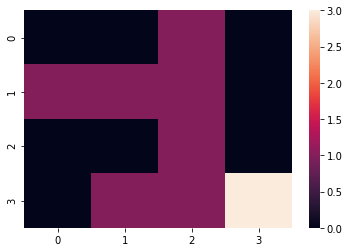

In [41]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [42]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3
           2       0.25      1.00      0.40         1
           3       1.00      0.60      0.75         5

    accuracy                           0.50        10
   macro avg       0.44      0.48      0.39        10
weighted avg       0.68      0.50      0.53        10



### Resultados inaceitáveis

# 2º teste: Submissão dos dados a uma FFT 

In [43]:
CHUNK = 1024 *2

def apply_fft_in_df(dataInt):
    fft_value = np.fft.fft(dataInt)
    absolute_value = np.abs(fft_value)
    audio_freq_convert = absolute_value *2 / (33000*CHUNK) 
    return audio_freq_convert

X_fft = X.apply(apply_fft_in_df, axis=1, result_type='expand')

## Separação treino e teste 

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=42)

# Treino de algoritmo 

In [45]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.700


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.700


DecisionTreeClassifier()
model score: 0.500


RandomForestClassifier()
model score: 0.600


AdaBoostClassifier()
model score: 0.300


GradientBoostingClassifier()
model score: 0.600




In [46]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [47]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.3421
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.2632
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.2632
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.6210 - accuracy: 0.2632
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.2632
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.2632
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.2632
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5278 - accuracy: 0.2632
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5009 - accuracy: 0.2632
Epoch 11/1000
1/1 [

1/1 [==============================] - 0s 2ms/step - loss: -8.4524 - accuracy: 0.2632
Epoch 84/1000
1/1 [==============================] - 0s 2ms/step - loss: -8.7852 - accuracy: 0.2632
Epoch 85/1000
1/1 [==============================] - 0s 2ms/step - loss: -9.1281 - accuracy: 0.2632
Epoch 86/1000
1/1 [==============================] - 0s 2ms/step - loss: -9.4815 - accuracy: 0.2632
Epoch 87/1000
1/1 [==============================] - 0s 2ms/step - loss: -9.8454 - accuracy: 0.2632
Epoch 88/1000
1/1 [==============================] - 0s 2ms/step - loss: -10.2201 - accuracy: 0.2632
Epoch 89/1000
1/1 [==============================] - 0s 2ms/step - loss: -10.6058 - accuracy: 0.2632
Epoch 90/1000
1/1 [==============================] - 0s 2ms/step - loss: -11.0026 - accuracy: 0.2632
Epoch 91/1000
1/1 [==============================] - 0s 2ms/step - loss: -11.4107 - accuracy: 0.2632
Epoch 92/1000
1/1 [==============================] - 0s 2ms/step - loss: -11.8304 - accuracy: 0.2632
Epoch 93/

1/1 [==============================] - 0s 2ms/step - loss: -83.5324 - accuracy: 0.2632
Epoch 164/1000
1/1 [==============================] - 0s 2ms/step - loss: -85.3084 - accuracy: 0.2632
Epoch 165/1000
1/1 [==============================] - 0s 4ms/step - loss: -87.1106 - accuracy: 0.2632
Epoch 166/1000
1/1 [==============================] - 0s 2ms/step - loss: -88.9392 - accuracy: 0.2632
Epoch 167/1000
1/1 [==============================] - 0s 2ms/step - loss: -90.7943 - accuracy: 0.2632
Epoch 168/1000
1/1 [==============================] - 0s 2ms/step - loss: -92.6761 - accuracy: 0.2632
Epoch 169/1000
1/1 [==============================] - 0s 2ms/step - loss: -94.5849 - accuracy: 0.2632
Epoch 170/1000
1/1 [==============================] - 0s 2ms/step - loss: -96.5209 - accuracy: 0.2632
Epoch 171/1000
1/1 [==============================] - 0s 3ms/step - loss: -98.4841 - accuracy: 0.2632
Epoch 172/1000
1/1 [==============================] - 0s 5ms/step - loss: -100.4750 - accuracy: 0

1/1 [==============================] - 0s 2ms/step - loss: -319.8232 - accuracy: 0.2632
Epoch 243/1000
1/1 [==============================] - 0s 3ms/step - loss: -324.2622 - accuracy: 0.2632
Epoch 244/1000
1/1 [==============================] - 0s 2ms/step - loss: -328.7426 - accuracy: 0.2632
Epoch 245/1000
1/1 [==============================] - 0s 2ms/step - loss: -333.2646 - accuracy: 0.2632
Epoch 246/1000
1/1 [==============================] - 0s 4ms/step - loss: -337.8281 - accuracy: 0.2632
Epoch 247/1000
1/1 [==============================] - 0s 3ms/step - loss: -342.4336 - accuracy: 0.2632
Epoch 248/1000
1/1 [==============================] - 0s 3ms/step - loss: -347.0810 - accuracy: 0.2632
Epoch 249/1000
1/1 [==============================] - 0s 5ms/step - loss: -351.7706 - accuracy: 0.2632
Epoch 250/1000
1/1 [==============================] - 0s 2ms/step - loss: -356.5027 - accuracy: 0.2632
Epoch 251/1000
1/1 [==============================] - 0s 8ms/step - loss: -361.2773 - ac

1/1 [==============================] - 0s 2ms/step - loss: -811.8497 - accuracy: 0.2632
Epoch 322/1000
1/1 [==============================] - 0s 2ms/step - loss: -820.0959 - accuracy: 0.2632
Epoch 323/1000
1/1 [==============================] - 0s 2ms/step - loss: -828.3971 - accuracy: 0.2632
Epoch 324/1000
1/1 [==============================] - 0s 2ms/step - loss: -836.7535 - accuracy: 0.2632
Epoch 325/1000
1/1 [==============================] - 0s 2ms/step - loss: -845.1652 - accuracy: 0.2632
Epoch 326/1000
1/1 [==============================] - 0s 2ms/step - loss: -853.6326 - accuracy: 0.2632
Epoch 327/1000
1/1 [==============================] - 0s 2ms/step - loss: -862.1555 - accuracy: 0.2632
Epoch 328/1000
1/1 [==============================] - 0s 2ms/step - loss: -870.7344 - accuracy: 0.2632
Epoch 329/1000
1/1 [==============================] - 0s 2ms/step - loss: -879.3693 - accuracy: 0.2632
Epoch 330/1000
1/1 [==============================] - 0s 2ms/step - loss: -888.0604 - ac

1/1 [==============================] - 0s 2ms/step - loss: -1645.6241 - accuracy: 0.2632
Epoch 401/1000
1/1 [==============================] - 0s 8ms/step - loss: -1658.7117 - accuracy: 0.2632
Epoch 402/1000
1/1 [==============================] - 0s 10ms/step - loss: -1671.8668 - accuracy: 0.2632
Epoch 403/1000
1/1 [==============================] - 0s 2ms/step - loss: -1685.0894 - accuracy: 0.2632
Epoch 404/1000
1/1 [==============================] - 0s 2ms/step - loss: -1698.3799 - accuracy: 0.2632
Epoch 405/1000
1/1 [==============================] - 0s 4ms/step - loss: -1711.7380 - accuracy: 0.2632
Epoch 406/1000
1/1 [==============================] - 0s 2ms/step - loss: -1725.1649 - accuracy: 0.2632
Epoch 407/1000
1/1 [==============================] - 0s 2ms/step - loss: -1738.6593 - accuracy: 0.2632
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: -1752.2224 - accuracy: 0.2632
Epoch 409/1000
1/1 [==============================] - 0s 2ms/step - loss: -176

1/1 [==============================] - 0s 4ms/step - loss: -2880.3113 - accuracy: 0.2632
Epoch 479/1000
1/1 [==============================] - 0s 5ms/step - loss: -2899.1008 - accuracy: 0.2632
Epoch 480/1000
1/1 [==============================] - 0s 5ms/step - loss: -2917.9692 - accuracy: 0.2632
Epoch 481/1000
1/1 [==============================] - 0s 4ms/step - loss: -2936.9172 - accuracy: 0.2632
Epoch 482/1000
1/1 [==============================] - 0s 3ms/step - loss: -2955.9431 - accuracy: 0.2632
Epoch 483/1000
1/1 [==============================] - 0s 4ms/step - loss: -2975.0486 - accuracy: 0.2632
Epoch 484/1000
1/1 [==============================] - 0s 4ms/step - loss: -2994.2332 - accuracy: 0.2632
Epoch 485/1000
1/1 [==============================] - 0s 4ms/step - loss: -3013.4973 - accuracy: 0.2632
Epoch 486/1000
1/1 [==============================] - 0s 6ms/step - loss: -3032.8406 - accuracy: 0.2632
Epoch 487/1000
1/1 [==============================] - ETA: 0s - loss: -3052.263

1/1 [==============================] - 0s 2ms/step - loss: -4592.4067 - accuracy: 0.2632
Epoch 557/1000
1/1 [==============================] - 0s 2ms/step - loss: -4617.7334 - accuracy: 0.2632
Epoch 558/1000
1/1 [==============================] - 0s 2ms/step - loss: -4643.1489 - accuracy: 0.2632
Epoch 559/1000
1/1 [==============================] - 0s 2ms/step - loss: -4668.6533 - accuracy: 0.2632
Epoch 560/1000
1/1 [==============================] - 0s 2ms/step - loss: -4694.2471 - accuracy: 0.2632
Epoch 561/1000
1/1 [==============================] - 0s 2ms/step - loss: -4719.9307 - accuracy: 0.2632
Epoch 562/1000
1/1 [==============================] - 0s 2ms/step - loss: -4745.7017 - accuracy: 0.2632
Epoch 563/1000
1/1 [==============================] - 0s 2ms/step - loss: -4771.5640 - accuracy: 0.2632
Epoch 564/1000
1/1 [==============================] - 0s 2ms/step - loss: -4797.5151 - accuracy: 0.2632
Epoch 565/1000
1/1 [==============================] - 0s 2ms/step - loss: -4823

1/1 [==============================] - 0s 5ms/step - loss: -6844.1270 - accuracy: 0.2632
Epoch 635/1000
1/1 [==============================] - 0s 5ms/step - loss: -6876.7515 - accuracy: 0.2632
Epoch 636/1000
1/1 [==============================] - 0s 2ms/step - loss: -6909.4736 - accuracy: 0.2632
Epoch 637/1000
1/1 [==============================] - 0s 4ms/step - loss: -6942.2954 - accuracy: 0.2632
Epoch 638/1000
1/1 [==============================] - 0s 9ms/step - loss: -6975.2148 - accuracy: 0.2632
Epoch 639/1000
1/1 [==============================] - 0s 1ms/step - loss: -7008.2334 - accuracy: 0.2632
Epoch 640/1000
1/1 [==============================] - 0s 3ms/step - loss: -7041.3496 - accuracy: 0.2632
Epoch 641/1000
1/1 [==============================] - 0s 2ms/step - loss: -7074.5649 - accuracy: 0.2632
Epoch 642/1000
1/1 [==============================] - 0s 2ms/step - loss: -7107.8799 - accuracy: 0.2632
Epoch 643/1000
1/1 [==============================] - 0s 2ms/step - loss: -7141

1/1 [==============================] - 0s 2ms/step - loss: -9692.2773 - accuracy: 0.2632
Epoch 713/1000
1/1 [==============================] - 0s 2ms/step - loss: -9732.8965 - accuracy: 0.2632
Epoch 714/1000
1/1 [==============================] - 0s 2ms/step - loss: -9773.6201 - accuracy: 0.2632
Epoch 715/1000
1/1 [==============================] - 0s 2ms/step - loss: -9814.4502 - accuracy: 0.2632
Epoch 716/1000
1/1 [==============================] - 0s 8ms/step - loss: -9855.3887 - accuracy: 0.2632
Epoch 717/1000
1/1 [==============================] - 0s 2ms/step - loss: -9896.4355 - accuracy: 0.2632
Epoch 718/1000
1/1 [==============================] - 0s 2ms/step - loss: -9937.5879 - accuracy: 0.2632
Epoch 719/1000
1/1 [==============================] - 0s 2ms/step - loss: -9978.8486 - accuracy: 0.2632
Epoch 720/1000
1/1 [==============================] - 0s 1ms/step - loss: -10020.2158 - accuracy: 0.2632
Epoch 721/1000
1/1 [==============================] - 0s 2ms/step - loss: -100

1/1 [==============================] - 0s 1ms/step - loss: -13188.7939 - accuracy: 0.2632
Epoch 791/1000
1/1 [==============================] - 0s 3ms/step - loss: -13238.0400 - accuracy: 0.2632
Epoch 792/1000
1/1 [==============================] - 0s 2ms/step - loss: -13287.4033 - accuracy: 0.2632
Epoch 793/1000
1/1 [==============================] - 0s 1ms/step - loss: -13336.8818 - accuracy: 0.2632
Epoch 794/1000
1/1 [==============================] - 0s 887us/step - loss: -13386.4736 - accuracy: 0.2632
Epoch 795/1000
1/1 [==============================] - 0s 4ms/step - loss: -13436.1807 - accuracy: 0.2632
Epoch 796/1000
1/1 [==============================] - 0s 4ms/step - loss: -13486.0020 - accuracy: 0.2632
Epoch 797/1000
1/1 [==============================] - 0s 3ms/step - loss: -13535.9395 - accuracy: 0.2632
Epoch 798/1000
1/1 [==============================] - 0s 1ms/step - loss: -13585.9922 - accuracy: 0.2632
Epoch 799/1000
1/1 [==============================] - 0s 2ms/step - 

1/1 [==============================] - 0s 4ms/step - loss: -17381.7402 - accuracy: 0.2632
Epoch 869/1000
1/1 [==============================] - 0s 4ms/step - loss: -17440.2305 - accuracy: 0.2632
Epoch 870/1000
1/1 [==============================] - 0s 7ms/step - loss: -17498.8438 - accuracy: 0.2632
Epoch 871/1000
1/1 [==============================] - 0s 4ms/step - loss: -17557.5781 - accuracy: 0.2632
Epoch 872/1000
1/1 [==============================] - 0s 5ms/step - loss: -17616.4355 - accuracy: 0.2632
Epoch 873/1000
1/1 [==============================] - 0s 2ms/step - loss: -17675.4141 - accuracy: 0.2632
Epoch 874/1000
1/1 [==============================] - 0s 2ms/step - loss: -17734.5176 - accuracy: 0.2632
Epoch 875/1000
1/1 [==============================] - 0s 2ms/step - loss: -17793.7441 - accuracy: 0.2632
Epoch 876/1000
1/1 [==============================] - 0s 2ms/step - loss: -17853.0898 - accuracy: 0.2632
Epoch 877/1000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: -22317.4668 - accuracy: 0.2632
Epoch 947/1000
1/1 [==============================] - 0s 1ms/step - loss: -22385.7402 - accuracy: 0.2632
Epoch 948/1000
1/1 [==============================] - 0s 1ms/step - loss: -22454.1445 - accuracy: 0.2632
Epoch 949/1000
1/1 [==============================] - 0s 1ms/step - loss: -22522.6738 - accuracy: 0.2632
Epoch 950/1000
1/1 [==============================] - 0s 1ms/step - loss: -22591.3340 - accuracy: 0.2632
Epoch 951/1000
1/1 [==============================] - 0s 2ms/step - loss: -22660.1250 - accuracy: 0.2632
Epoch 952/1000
1/1 [==============================] - 0s 1ms/step - loss: -22729.0449 - accuracy: 0.2632
Epoch 953/1000
1/1 [==============================] - 0s 1ms/step - loss: -22798.0898 - accuracy: 0.2632
Epoch 954/1000
1/1 [==============================] - 0s 2ms/step - loss: -22867.2637 - accuracy: 0.2632
Epoch 955/1000
1/1 [==============================] - 0s 1ms/step - lo

In [48]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: -61118.3203 - accuracy: 0.2000
Accuracy: 20.00


### Notas:
* Performance pifia, NuSVC parece promissor

# Teste do melhor algoritimo com outras métricas

In [49]:
clf = NuSVC(probability=True, gamma="auto")
clf.fit(X_train, y_train)   

NuSVC(gamma='auto', probability=True)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predicoes = clf.predict(X_test)

In [51]:
accuracy_score(predicoes, y_test)

0.7

In [52]:
confusion_matrix(predicoes, y_test)

array([[1, 0, 1, 0],
       [0, 2, 2, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 3]])

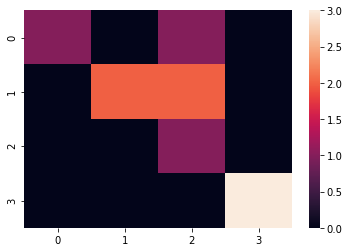

In [53]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [54]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         4
           2       0.25      1.00      0.40         1
           3       1.00      1.00      1.00         3

    accuracy                           0.70        10
   macro avg       0.81      0.75      0.68        10
weighted avg       0.93      0.70      0.74        10



### Resultados melhoraram, mas ainda não estão ideais

# 3º Teste: obter os valores de média, minimo e máximo e a média da parte real e imaginária da FFT 

In [55]:
def transform_array(arr):
    mean = arr.mean()
    minimun = arr.min()
    maximun = arr.max()
    
    fft_value = np.fft.fft(arr)
    real_part = np.abs(fft_value).mean()
    imaginary_part = np.imag(fft_value).mean()
    
    return np.array([mean, minimun, maximun, real_part, imaginary_part])

In [56]:
transform_array(X.iloc[0])

array([ 2.42838379e+02, -3.65200000e+03,  3.63100000e+03,  2.50701919e+04,
       -3.41060513e-13])

In [57]:
X_transform = X.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,242.838379,-3652.0,3631.0,25070.191946,-3.410605e-13
1,219.695801,-1806.0,2880.0,15820.119306,2.273737e-13
2,290.552246,-664.0,1464.0,6144.417066,5.684342e-14
3,232.500000,-1657.0,1979.0,11172.263724,-7.105427e-14
4,268.962402,-1529.0,1688.0,8933.686801,4.263256e-14
5,272.150879,-2832.0,2976.0,20208.769310,5.684342e-14
6,275.951660,-2749.0,4016.0,21641.380424,-4.547474e-13
7,278.414551,-1717.0,2268.0,10324.994237,-2.842171e-14
8,274.631348,-1662.0,1859.0,9631.646442,1.136868e-13
9,237.368652,-2005.0,2171.0,13215.504162,-5.684342e-14


In [58]:
X_output = X_transform.copy()
X_output['class'] = y

X_output.to_csv('Saídas/X_transform.csv')

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.300


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.100


DecisionTreeClassifier()
model score: 0.400


RandomForestClassifier()
model score: 0.200


AdaBoostClassifier()
model score: 0.300


GradientBoostingClassifier()
model score: 0.400




In [61]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_deep = np.asarray(X_train)
y_train_deep = np.asarray(y_train)
X_test_deep = np.asarray(X_test)
y_test_deep = np.asarray(y_test)

In [62]:
model.fit(X_train_deep, y_train_deep, epochs=1000, batch_size=100)

Epoch 1/1000
1/1 [==============================] - 0s 3ms/step - loss: -822.4322 - accuracy: 0.2632
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: -844.9540 - accuracy: 0.2632
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: -868.5936 - accuracy: 0.2632
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: -893.3969 - accuracy: 0.2632
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: -918.5930 - accuracy: 0.2632
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: -944.4957 - accuracy: 0.2632
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: -970.7309 - accuracy: 0.2632
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: -997.1924 - accuracy: 0.2632
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: -1023.8720 - accuracy: 0.2632
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: -1050.7632 - accu

1/1 [==============================] - 0s 2ms/step - loss: -3351.8430 - accuracy: 0.2632
Epoch 80/1000
1/1 [==============================] - 0s 6ms/step - loss: -3393.8291 - accuracy: 0.2632
Epoch 81/1000
1/1 [==============================] - 0s 6ms/step - loss: -3436.2468 - accuracy: 0.2632
Epoch 82/1000
1/1 [==============================] - 0s 4ms/step - loss: -3479.1016 - accuracy: 0.2632
Epoch 83/1000
1/1 [==============================] - 0s 11ms/step - loss: -3522.3960 - accuracy: 0.2632
Epoch 84/1000
1/1 [==============================] - 0s 9ms/step - loss: -3566.1357 - accuracy: 0.2632
Epoch 85/1000
1/1 [==============================] - 0s 9ms/step - loss: -3610.3232 - accuracy: 0.2632
Epoch 86/1000
1/1 [==============================] - ETA: 0s - loss: -3654.9641 - accuracy: 0.26 - 0s 9ms/step - loss: -3654.9641 - accuracy: 0.2632
Epoch 87/1000
1/1 [==============================] - 0s 2ms/step - loss: -3700.0625 - accuracy: 0.2632
Epoch 88/1000
1/1 [=====================

1/1 [==============================] - 0s 4ms/step - loss: -8166.5000 - accuracy: 0.2632
Epoch 157/1000
1/1 [==============================] - 0s 6ms/step - loss: -8254.7285 - accuracy: 0.2632
Epoch 158/1000
1/1 [==============================] - 0s 11ms/step - loss: -8343.7432 - accuracy: 0.2632
Epoch 159/1000
1/1 [==============================] - 0s 6ms/step - loss: -8433.5547 - accuracy: 0.2632
Epoch 160/1000
1/1 [==============================] - 0s 2ms/step - loss: -8524.1670 - accuracy: 0.2632
Epoch 161/1000
1/1 [==============================] - 0s 2ms/step - loss: -8615.5840 - accuracy: 0.2632
Epoch 162/1000
1/1 [==============================] - 0s 4ms/step - loss: -8707.8105 - accuracy: 0.2632
Epoch 163/1000
1/1 [==============================] - 0s 2ms/step - loss: -8800.8545 - accuracy: 0.2632
Epoch 164/1000
1/1 [==============================] - 0s 2ms/step - loss: -8894.7188 - accuracy: 0.2632
Epoch 165/1000
1/1 [==============================] - 0s 3ms/step - loss: -898

1/1 [==============================] - 0s 5ms/step - loss: -17527.7891 - accuracy: 0.2632
Epoch 233/1000
1/1 [==============================] - 0s 5ms/step - loss: -17693.0000 - accuracy: 0.2632
Epoch 234/1000
1/1 [==============================] - 0s 3ms/step - loss: -17859.4844 - accuracy: 0.2632
Epoch 235/1000
1/1 [==============================] - 0s 3ms/step - loss: -18027.2441 - accuracy: 0.2632
Epoch 236/1000
1/1 [==============================] - 0s 4ms/step - loss: -18196.2949 - accuracy: 0.2632
Epoch 237/1000
1/1 [==============================] - 0s 2ms/step - loss: -18366.6348 - accuracy: 0.2632
Epoch 238/1000
1/1 [==============================] - 0s 4ms/step - loss: -18538.2793 - accuracy: 0.2632
Epoch 239/1000
1/1 [==============================] - 0s 3ms/step - loss: -18711.2344 - accuracy: 0.2632
Epoch 240/1000
1/1 [==============================] - ETA: 0s - loss: -18885.5059 - accuracy: 0.263 - 0s 3ms/step - loss: -18885.5059 - accuracy: 0.2632
Epoch 241/1000
1/1 [==

1/1 [==============================] - 0s 2ms/step - loss: -34255.4648 - accuracy: 0.2632
Epoch 309/1000
1/1 [==============================] - 0s 5ms/step - loss: -34539.5352 - accuracy: 0.2632
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: -34825.4609 - accuracy: 0.2632
Epoch 311/1000
1/1 [==============================] - 0s 1ms/step - loss: -35113.2500 - accuracy: 0.2632
Epoch 312/1000
1/1 [==============================] - 0s 2ms/step - loss: -35402.9102 - accuracy: 0.2632
Epoch 313/1000
1/1 [==============================] - 0s 2ms/step - loss: -35694.4609 - accuracy: 0.2632
Epoch 314/1000
1/1 [==============================] - 0s 2ms/step - loss: -35987.8867 - accuracy: 0.2632
Epoch 315/1000
1/1 [==============================] - 0s 2ms/step - loss: -36283.2109 - accuracy: 0.2632
Epoch 316/1000
1/1 [==============================] - 0s 6ms/step - loss: -36580.4375 - accuracy: 0.2632
Epoch 317/1000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: -62065.3164 - accuracy: 0.2632
Epoch 386/1000
1/1 [==============================] - 0s 4ms/step - loss: -62512.0859 - accuracy: 0.2632
Epoch 387/1000
1/1 [==============================] - 0s 2ms/step - loss: -62961.2109 - accuracy: 0.2632
Epoch 388/1000
1/1 [==============================] - 0s 2ms/step - loss: -63412.7109 - accuracy: 0.2632
Epoch 389/1000
1/1 [==============================] - 0s 2ms/step - loss: -63866.5664 - accuracy: 0.2632
Epoch 390/1000
1/1 [==============================] - 0s 4ms/step - loss: -64322.7891 - accuracy: 0.2632
Epoch 391/1000
1/1 [==============================] - 0s 2ms/step - loss: -64781.4062 - accuracy: 0.2632
Epoch 392/1000
1/1 [==============================] - 0s 2ms/step - loss: -65242.4219 - accuracy: 0.2632
Epoch 393/1000
1/1 [==============================] - 0s 2ms/step - loss: -65705.8047 - accuracy: 0.2632
Epoch 394/1000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 4ms/step - loss: -104428.8281 - accuracy: 0.2632
Epoch 464/1000
1/1 [==============================] - 0s 5ms/step - loss: -105076.5156 - accuracy: 0.2632
Epoch 465/1000
1/1 [==============================] - 0s 3ms/step - loss: -105727.0156 - accuracy: 0.2632
Epoch 466/1000
1/1 [==============================] - 0s 4ms/step - loss: -106380.3125 - accuracy: 0.2632
Epoch 467/1000
1/1 [==============================] - 0s 4ms/step - loss: -107036.3906 - accuracy: 0.2632
Epoch 468/1000
1/1 [==============================] - 0s 4ms/step - loss: -107695.2812 - accuracy: 0.2632
Epoch 469/1000
1/1 [==============================] - 0s 4ms/step - loss: -108357.0000 - accuracy: 0.2632
Epoch 470/1000
1/1 [==============================] - 0s 2ms/step - loss: -109021.5234 - accuracy: 0.2632
Epoch 471/1000
1/1 [==============================] - 0s 2ms/step - loss: -109688.8672 - accuracy: 0.2632
Epoch 472/1000
1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 10ms/step - loss: -161973.1250 - accuracy: 0.2632
Epoch 540/1000
1/1 [==============================] - 0s 7ms/step - loss: -162847.6094 - accuracy: 0.2632
Epoch 541/1000
1/1 [==============================] - 0s 7ms/step - loss: -163725.2031 - accuracy: 0.2632
Epoch 542/1000
1/1 [==============================] - 0s 6ms/step - loss: -164606.0000 - accuracy: 0.2632
Epoch 543/1000
1/1 [==============================] - 0s 6ms/step - loss: -165489.9844 - accuracy: 0.2632
Epoch 544/1000
1/1 [==============================] - 0s 11ms/step - loss: -166377.1562 - accuracy: 0.2632
Epoch 545/1000
1/1 [==============================] - 0s 5ms/step - loss: -167267.5000 - accuracy: 0.2632
Epoch 546/1000
1/1 [==============================] - 0s 7ms/step - loss: -168161.0781 - accuracy: 0.2632
Epoch 547/1000
1/1 [==============================] - 0s 1ms/step - loss: -169057.8594 - accuracy: 0.2632
Epoch 548/1000
1/1 [==============================] - 0s 1m

1/1 [==============================] - 0s 1ms/step - loss: -237806.2031 - accuracy: 0.2632
Epoch 616/1000
1/1 [==============================] - 0s 1ms/step - loss: -238935.1094 - accuracy: 0.2632
Epoch 617/1000
1/1 [==============================] - 0s 2ms/step - loss: -240067.5000 - accuracy: 0.2632
Epoch 618/1000
1/1 [==============================] - 0s 2ms/step - loss: -241203.4531 - accuracy: 0.2632
Epoch 619/1000
1/1 [==============================] - 0s 2ms/step - loss: -242342.9219 - accuracy: 0.2632
Epoch 620/1000
1/1 [==============================] - 0s 4ms/step - loss: -243485.9688 - accuracy: 0.2632
Epoch 621/1000
1/1 [==============================] - 0s 4ms/step - loss: -244632.5312 - accuracy: 0.2632
Epoch 622/1000
1/1 [==============================] - 0s 3ms/step - loss: -245782.6250 - accuracy: 0.2632
Epoch 623/1000
1/1 [==============================] - 0s 3ms/step - loss: -246936.2969 - accuracy: 0.2632
Epoch 624/1000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: -333938.9062 - accuracy: 0.2632
Epoch 692/1000
1/1 [==============================] - 0s 2ms/step - loss: -335347.4688 - accuracy: 0.2632
Epoch 693/1000
1/1 [==============================] - 0s 7ms/step - loss: -336759.9062 - accuracy: 0.2632
Epoch 694/1000
1/1 [==============================] - 0s 2ms/step - loss: -338176.2188 - accuracy: 0.2632
Epoch 695/1000
1/1 [==============================] - 0s 7ms/step - loss: -339596.3125 - accuracy: 0.2632
Epoch 696/1000
1/1 [==============================] - 0s 2ms/step - loss: -341020.2812 - accuracy: 0.2632
Epoch 697/1000
1/1 [==============================] - 0s 2ms/step - loss: -342448.1562 - accuracy: 0.2632
Epoch 698/1000
1/1 [==============================] - 0s 2ms/step - loss: -343879.7500 - accuracy: 0.2632
Epoch 699/1000
1/1 [==============================] - 0s 2ms/step - loss: -345315.3438 - accuracy: 0.2632
Epoch 700/1000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 2ms/step - loss: -452204.5938 - accuracy: 0.2632
Epoch 768/1000
1/1 [==============================] - 0s 1ms/step - loss: -453915.9062 - accuracy: 0.2632
Epoch 769/1000
1/1 [==============================] - 0s 2ms/step - loss: -455631.3125 - accuracy: 0.2632
Epoch 770/1000
1/1 [==============================] - 0s 2ms/step - loss: -457350.9375 - accuracy: 0.2632
Epoch 771/1000
1/1 [==============================] - 0s 889us/step - loss: -459074.5938 - accuracy: 0.2632
Epoch 772/1000
1/1 [==============================] - 0s 5ms/step - loss: -460802.4062 - accuracy: 0.2632
Epoch 773/1000
1/1 [==============================] - 0s 886us/step - loss: -462534.4688 - accuracy: 0.2632
Epoch 774/1000
1/1 [==============================] - 0s 2ms/step - loss: -464270.5312 - accuracy: 0.2632
Epoch 775/1000
1/1 [==============================] - 0s 3ms/step - loss: -466010.8438 - accuracy: 0.2632
Epoch 776/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 2ms/step - loss: -594278.1875 - accuracy: 0.2632
Epoch 844/1000
1/1 [==============================] - 0s 4ms/step - loss: -596313.1250 - accuracy: 0.2632
Epoch 845/1000
1/1 [==============================] - 0s 4ms/step - loss: -598352.7500 - accuracy: 0.2632
Epoch 846/1000
1/1 [==============================] - 0s 2ms/step - loss: -600396.6250 - accuracy: 0.2632
Epoch 847/1000
1/1 [==============================] - 0s 2ms/step - loss: -602444.8125 - accuracy: 0.2632
Epoch 848/1000
1/1 [==============================] - 0s 2ms/step - loss: -604497.5000 - accuracy: 0.2632
Epoch 849/1000
1/1 [==============================] - 0s 14ms/step - loss: -606554.5625 - accuracy: 0.2632
Epoch 850/1000
1/1 [==============================] - 0s 1ms/step - loss: -608616.0000 - accuracy: 0.2632
Epoch 851/1000
1/1 [==============================] - 0s 1ms/step - loss: -610682.0000 - accuracy: 0.2632
Epoch 852/1000
1/1 [==============================] - 0s 1ms

1/1 [==============================] - 0s 5ms/step - loss: -761693.1250 - accuracy: 0.2632
Epoch 920/1000
1/1 [==============================] - 0s 2ms/step - loss: -764071.1875 - accuracy: 0.2632
Epoch 921/1000
1/1 [==============================] - 0s 2ms/step - loss: -766454.0625 - accuracy: 0.2632
Epoch 922/1000
1/1 [==============================] - 0s 11ms/step - loss: -768841.5000 - accuracy: 0.2632
Epoch 923/1000
1/1 [==============================] - 0s 7ms/step - loss: -771233.6250 - accuracy: 0.2632
Epoch 924/1000
1/1 [==============================] - 0s 1ms/step - loss: -773630.3750 - accuracy: 0.2632
Epoch 925/1000
1/1 [==============================] - 0s 6ms/step - loss: -776031.6250 - accuracy: 0.2632
Epoch 926/1000
1/1 [==============================] - 0s 2ms/step - loss: -778437.6875 - accuracy: 0.2632
Epoch 927/1000
1/1 [==============================] - 0s 2ms/step - loss: -780848.4375 - accuracy: 0.2632
Epoch 928/1000
1/1 [==============================] - 0s 2ms

Epoch 995/1000
1/1 [==============================] - 0s 3ms/step - loss: -955856.8125 - accuracy: 0.2632
Epoch 996/1000
1/1 [==============================] - 0s 4ms/step - loss: -958595.8750 - accuracy: 0.2632
Epoch 997/1000
1/1 [==============================] - 0s 3ms/step - loss: -961339.8125 - accuracy: 0.2632
Epoch 998/1000
1/1 [==============================] - 0s 3ms/step - loss: -964088.5000 - accuracy: 0.2632
Epoch 999/1000
1/1 [==============================] - 0s 3ms/step - loss: -966842.1250 - accuracy: 0.2632
Epoch 1000/1000
1/1 [==============================] - 0s 2ms/step - loss: -969600.6250 - accuracy: 0.2632


In [63]:
_, accuracy = model.evaluate(X_test_deep, y_test_deep)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 2ms/step - loss: -2284013.5000 - accuracy: 0.2000
Accuracy: 20.00


### Notas
* Melhoria significativa em disversos algoritmos
* Redes Neurais ainda se mostram muito ineficientes

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [71]:
accuracy_score(predicoes, y_test)

0.4

In [72]:
confusion_matrix(predicoes, y_test)

array([[0, 0, 2, 1],
       [0, 2, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 0, 1]])

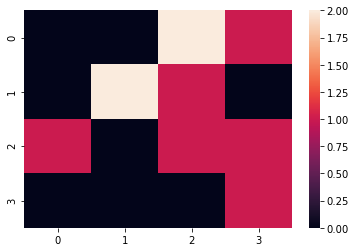

In [73]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [74]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      0.67      0.80         3
           2       0.25      0.33      0.29         3
           3       0.33      1.00      0.50         1

    accuracy                           0.40        10
   macro avg       0.40      0.50      0.40        10
weighted avg       0.41      0.40      0.38        10



In [75]:
lbl_enc.inverse_transform([0,1,2,3])

array(['0 - Regime Normal/', '1 - Falta de tensão/', '2 - Sobrecarga/',
       '3 - Desbalanceamento do eixo/'], dtype=object)

## Notas
* O algoritmo está com dificuldades para diferenciar entre o 'Regime Normal' e a 'Sobrecarga' porém identifica perfeitamente a 'Falta de Tensão' e o 'Desbalanceamento de eixo'

# 4º Teste: Aplicando pré-processamento de dados com as técnicas do 3º teste

In [76]:
from sklearn.preprocessing import StandardScaler

X_scale = StandardScaler().fit_transform(X_transform)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.500


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.600


DecisionTreeClassifier()
model score: 0.500


RandomForestClassifier()
model score: 0.200


AdaBoostClassifier()
model score: 0.300


GradientBoostingClassifier()
model score: 0.400




In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  
predicoes = clf.predict(X_test)

In [80]:
confusion_matrix(predicoes, y_test)

array([[1, 0, 2, 1],
       [0, 2, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 1]])

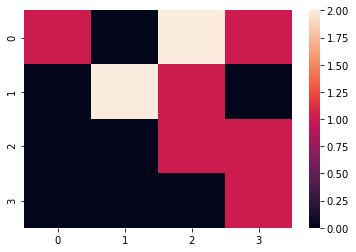

In [81]:
sns.heatmap(confusion_matrix(predicoes, y_test));

In [82]:
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      0.67      0.80         3
           2       0.25      0.50      0.33         2
           3       0.33      1.00      0.50         1

    accuracy                           0.50        10
   macro avg       0.65      0.60      0.51        10
weighted avg       0.78      0.50      0.52        10



# Notas:
* O algoritmo continua performando mal para diferenciar as classe "0" e "2"
* Será que um ganho no sinal ajudaria?

# 5º Teste: Aplicando um ganho com as técnicas do 3º teste

In [83]:
ganho = 0.5

def ganho_audio(row):
    return ganho * row

In [84]:
X_ganho = X.apply(ganho_audio, axis=1, result_type='expand')
X_transform = X_ganho.apply(transform_array, axis=1, result_type='expand')
X_transform.columns = ['Média', 'Minímo', 'Máximo', 'FFT Real', 'FFT Imaginário']
X_transform

,Média,Minímo,Máximo,FFT Real,FFT Imaginário
0,121.419189,-1826.0,1815.5,12535.095973,-1.705303e-13
1,109.847900,-903.0,1440.0,7910.059653,1.136868e-13
2,145.276123,-332.0,732.0,3072.208533,2.842171e-14
3,116.250000,-828.5,989.5,5586.131862,-3.552714e-14
4,134.481201,-764.5,844.0,4466.843400,2.131628e-14
5,136.075439,-1416.0,1488.0,10104.384655,2.842171e-14
6,137.975830,-1374.5,2008.0,10820.690212,-2.273737e-13
7,139.207275,-858.5,1134.0,5162.497119,-1.421085e-14
8,137.315674,-831.0,929.5,4815.823221,5.684342e-14
9,118.684326,-1002.5,1085.5,6607.752081,-2.842171e-14


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

In [86]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma="auto"),
    NuSVC(probability=True, gamma="auto"),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % classifier.score(X_test, y_test))
    print("\n")

KNeighborsClassifier(n_neighbors=3)
model score: 0.300


SVC(C=0.025, gamma='auto', probability=True)
model score: 0.100


NuSVC(gamma='auto', probability=True)
model score: 0.100


DecisionTreeClassifier()
model score: 0.400


RandomForestClassifier()
model score: 0.200


AdaBoostClassifier()
model score: 0.300


GradientBoostingClassifier()
model score: 0.400




# Conclusões:

* Melhor tratamento: Aplicar a FFT apenas (apply_fft_in_df)
* Melhor algoritmo: NuSVC

## Utilização da busca em grade para obter os melhores parâmetros da árvore de decisão

In [109]:
from sklearn.model_selection import train_test_split

CHUNK = 1024 *2

def apply_fft_in_df(dataInt):
    fft_value = np.fft.fft(dataInt)
    absolute_value = np.abs(fft_value)
    audio_freq_convert = absolute_value *2 / (33000*CHUNK) 
    return audio_freq_convert

X_fft = X.apply(apply_fft_in_df, axis=1, result_type='expand')

X_train, X_test, y_train, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=42)

In [110]:
from sklearn.model_selection import GridSearchCV
    
parameters = {        
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'probability': [True],
                'gamma': ['auto']
             }

svm = NuSVC()
clf = GridSearchCV(svm, parameters, verbose=3)

In [111]:
grid_search = clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END degree=1, gamma=auto, kernel=linear, probability=True;, score=0.625 total time=   0.0s
[CV 2/5] END degree=1, gamma=auto, kernel=linear, probability=True;, score=0.875 total time=   0.0s
[CV 3/5] END degree=1, gamma=auto, kernel=linear, probability=True;, score=1.000 total time=   0.0s
[CV 4/5] END degree=1, gamma=auto, kernel=linear, probability=True;, score=0.714 total time=   0.0s
[CV 5/5] END degree=1, gamma=auto, kernel=linear, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END degree=1, gamma=auto, kernel=poly, probability=True;, score=0.375 total time=   0.0s
[CV 2/5] END degree=1, gamma=auto, kernel=poly, probability=True;, score=0.750 total time=   0.0s
[CV 3/5] END degree=1, gamma=auto, kernel=poly, probability=True;, score=0.500 total time=   0.0s
[CV 4/5] END degree=1, gamma=auto, kernel=poly, probability=True;, score=0.714 total time=   0.0s
[CV 5/5] END degree=1, gamma=auto, kernel=poly

[CV 5/5] END degree=5, gamma=auto, kernel=poly, probability=True;, score=0.286 total time=   0.0s
[CV 1/5] END degree=5, gamma=auto, kernel=rbf, probability=True;, score=0.375 total time=   0.0s
[CV 2/5] END degree=5, gamma=auto, kernel=rbf, probability=True;, score=0.750 total time=   0.0s
[CV 3/5] END degree=5, gamma=auto, kernel=rbf, probability=True;, score=0.500 total time=   0.0s
[CV 4/5] END degree=5, gamma=auto, kernel=rbf, probability=True;, score=0.714 total time=   0.0s
[CV 5/5] END degree=5, gamma=auto, kernel=rbf, probability=True;, score=0.571 total time=   0.0s
[CV 1/5] END degree=5, gamma=auto, kernel=sigmoid, probability=True;, score=0.375 total time=   0.0s
[CV 2/5] END degree=5, gamma=auto, kernel=sigmoid, probability=True;, score=0.750 total time=   0.0s
[CV 3/5] END degree=5, gamma=auto, kernel=sigmoid, probability=True;, score=0.500 total time=   0.0s
[CV 4/5] END degree=5, gamma=auto, kernel=sigmoid, probability=True;, score=0.714 total time=   0.0s
[CV 5/5] END 

[CV 5/5] END degree=9, gamma=auto, kernel=rbf, probability=True;, score=0.571 total time=   0.0s
[CV 1/5] END degree=9, gamma=auto, kernel=sigmoid, probability=True;, score=0.375 total time=   0.0s
[CV 2/5] END degree=9, gamma=auto, kernel=sigmoid, probability=True;, score=0.750 total time=   0.0s
[CV 3/5] END degree=9, gamma=auto, kernel=sigmoid, probability=True;, score=0.500 total time=   0.0s
[CV 4/5] END degree=9, gamma=auto, kernel=sigmoid, probability=True;, score=0.714 total time=   0.0s
[CV 5/5] END degree=9, gamma=auto, kernel=sigmoid, probability=True;, score=0.714 total time=   0.0s
[CV 1/5] END degree=10, gamma=auto, kernel=linear, probability=True;, score=0.625 total time=   0.0s
[CV 2/5] END degree=10, gamma=auto, kernel=linear, probability=True;, score=0.875 total time=   0.0s
[CV 3/5] END degree=10, gamma=auto, kernel=linear, probability=True;, score=1.000 total time=   0.0s
[CV 4/5] END degree=10, gamma=auto, kernel=linear, probability=True;, score=0.714 total time=  

In [112]:
grid_search.best_params_

{'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'probability': True}

In [113]:
best_clf = grid_search.best_estimator_

In [114]:
predicoes = best_clf.predict(X_test)
print(classification_report(predicoes,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3
           2       0.75      0.75      0.75         4
           3       1.00      1.00      1.00         3

    accuracy                           0.80        10
   macro avg       0.69      0.60      0.64        10
weighted avg       0.90      0.80      0.84        10



/home/vinicio/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vinicio/anaconda3/envs/deep/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Resumo de exportação (modelo criado + funções de tratamento de dados)

#### Funções utilizadas

In [115]:
import numpy as np   
    
CHUNK = 1024 *2

def apply_fft_in_df(dataInt):
    """ Esta função retorna um array com a FFT"""    
    fft_value = np.fft.fft(dataInt)
    absolute_value = np.abs(fft_value)
    audio_freq_convert = absolute_value *2 / (33000*CHUNK) 
    return audio_freq_convert

#### Exportação do modelo criado

In [116]:
import pickle as pkl


with open('Preditores/classificador_som_indústrial.pkl', 'wb') as best_file:
    pkl.dump(best_clf, best_file)